In [3]:
isNetworksLoaded = False

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 23 09:54:37 2018

@author: admin


#TODO: Plot order param
#TODO: Remove edges
#TODO: Read theory
"""

import clustering_toolkit as ctk
import networkx as nx
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize


socialNetworkFile = "Data/social_network.gexf"
activityNetworkFile = "Data/activity_network_undirected.gexf"
#rootPath = "/Users/RamanSB/Documents/University/3rd-Year Physics/3rd Year Project/Real Data/"

startTime = time.time()

#isNetworksLoaded = False
if(not isNetworksLoaded):
    G_A = ctk.loadNetworkFromFilePath(activityNetworkFile)
    G_S = ctk.loadNetworkFromFilePath(socialNetworkFile)
    isNetworksLoaded = True

timeToLoadNetworksGEXF = time.time()-startTime
print("Network loaded in {}s".format(timeToLoadNetworksGEXF))

Network loaded in 33.5641303062439s


In [54]:
#FUNCTION DEFINITIONS
#V = len(list(G_A.edges())) #Desired volume of the network
Vmax = 500000

def calcDelta(network, V=Vmax,mstep=1000):
    '''
        V: in
            Maxm number of edges to add
        mstep:
            Number of edges to add between calculations of maxm component size
        network: nx.Graph / nx.DiGraph / nx.MultiDiGraph 
            Network to draw nodes from
        '''
    N = len(network.nodes())
    node_list = list(network.nodes())
    print('Network size: {}'.format(N))
    '''Calculate Delta from paper ["Explosive Percolation in Random Networks"]'''
    threshold1 = int(N**.5)
    threshold2 = int(.5*N)
    print('Threshold 1: {}'.format(threshold1))
    print('Threshold 2: {}'.format(threshold2))
    
    model1_ccs = list()   #Log of clustering coefficients over time
    model1_ncs = list()   #Log of number of connected components over time
    model1_acs = list()   #Log of average components sizes
    
    #ADD EDGES
    m = 0   #Number of edges added
    t0 = 0   #Time to reach threshold 1
    t1 = 0   #Time to reach threshold 2
    while m < V:
        #A user sends a message to any other user in the network with equal probability
        from_user = random.choice(node_list)
        to_user = random.choice(node_list)
        network.add_edge(from_user,to_user)
        m+=1
        if m % mstep == 0:
            print('m: {}'.format(m))
            #print('ORDER PARAMETER CANDIDATES:')
            
            #Number of SCCs, Av. SCC size
            SCCs = list(nx.strongly_connected_components(network))   #Strongly Connected Components at time n

            sum_comp_size = 0
            n_comp = 0
            for SCC in SCCs:
                sum_comp_size+=len(SCC)
                n_comp+=1
            av_comp_size=sum_comp_size/N
            model1_ncs.append(n_comp)
            model1_acs.append(av_comp_size)
            
            #Size of maxm component
            C = len(max(SCCs,key=len))
            
            if C > threshold1 and t0 == 0:
                #Past threshold 1 for the first time
                t0 = m - 1
                print("PAST THRESHOLD 1, m={}".format(m))
            if C > threshold2 and t0 > 0:
                #Past threshold 1 and threshold 2 for the first time
                t1 = m
                print("PAST THRESHOLD 2, m={}".format(m))
                break
            
            #PRINT STATS
            print("Largest component size: {}".format(C))
            #print('Number of strongly-connected components: {}'.format(N))
            #print('Av. size of strongly-connected components: {}'.format(av_comp_size))
    
    #        model1_c_d, model1_c = ctk.calculateClusteringCoeffPerNode(network)
    #        av_c = sum(model1_c)/len(model1_c)
    #        model1_ccs.append(av_c)
    print('FINISHED N={}'.format(N))
    if t0 == 0:
        print("WARNING: Didn't reach C>N**0.5 with V={}".format(V))
    if t1 == 0:
        print("WARNING: Didn't reach C>0.5*N with V={}".format(V))
    return t1-t0


#REMOVE NODES
#while n > 0:
#    #Pick a message at random, and erase it from the social network history
#    edge_to_remove = random.randint(0,n-1)
#    from_user = list(network.edges)[edge_to_remove][0]
#    to_user = list(network.edges)[edge_to_remove][1]
#    network.remove_edge(from_user,to_user)
#    
#    n-=1
#    if n % 100 == 0:
#        print('Calculating coefficients. Number of messages: {}'.format(n))
#        print('ORDER PARAMETER CANDIDATES:')
#        #Number of SCCs, Av. SCC size
#        SCCs = list(nx.strongly_connected_components(network))   #Strongly Connected Components at time n
#        
#        C = len(max(SCCs,key=len))   #Size of largest component
#        
#        print("Largest component size is: {}".format(C))
#        sum_comp_size = 0
#        N = 0
#        for SCC in SCCs:
#            sum_comp_size+=len(SCC)
#            N+=1
#        av_comp_size=sum_comp_size/N
#        model1_ncs.append(N)
#        model1_acs.append(av_comp_size)
#        print('Number of strongly-connected components: {}'.format(N))
#        print('Av. size of strongly-connected components: {}'.format(av_comp_size))
#
#print('FINISHED REMOVING NODES')

##PLOT
#fig = plt.figure()
#ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)
#ax1.plot(range(len(model1_ncs)),model1_ncs,label='Number of components')
#ax2.plot(range(len(model1_acs)),model1_acs,label='Average component size')
#ax1.set_xlabel('x100 wall posts')
#ax2.set_xlabel('x100 wall posts')
#ax1.set_ylabel('Number of components')
#ax2.set_ylabel('Average component size')

In [52]:
def test_phase_transition_type(Nlist,Vmax=500000,mstep=1000):
    #Is the phase transition first order?
    delta_list= list()
    for N in Nlist:
        print("test_phase_transition_type says: current N={}".format(N))
        node_list = list(range(N))   #Create an imaginary network
        network = nx.MultiDiGraph()
        network.add_nodes_from(node_list)
    
        #nodes_list = list(G_A.nodes())[:N]   #Take only a subset of 10000 nodes from the activity network
        #network = nx.MultiDiGraph()
        #network.add_nodes_from(nodes_list)
        delta = calcDelta(network,mstep=mstep)
        delta_list.append(delta)
        N += 10000

    #PLOT DATA
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(N_list,delta_list,'b-',label='Results')

    #FIT CURVE
    print('FITTING')
    def linear(x,a,b):
        return a*x+b
    
    #LINEAR
    lopt, lcov = optimize.curve_fit(linear,N_list,delta_list)
    l_a, l_b = lopt[0],lopt[1]   #Values of fit
    
    #ERRORS
    a_err = lcov[0,0]**.5
    b_err = lcov[1,1]**.5
    print('Fit params for ax+b: a={:.3g}±{:.3g}, b={:.3g}±{:.3g}'.format(l_a,a_err,l_b,b_err))
    ax.plot(N_list,linear(np.asarray(N_list),l_a,l_b),'g--',label='Linear fit')
    ax.set_title('Delta vs. network size, N')
    ax.set_xlabel('N')
    ax.set_ylabel(u'Δ')
    plt.show()

test_phase_transition_type says: current N=1000
Network size: 1000
Threshold 1: 31
Threshold 2: 500
m: 1000
Largest component size: 7
m: 2000
PAST THRESHOLD 1, m=2000
PAST THRESHOLD 2, m=2000
FINISHED N=1000
test_phase_transition_type says: current N=1500
Network size: 1500
Threshold 1: 38
Threshold 2: 750
m: 1000
Largest component size: 1
m: 2000
PAST THRESHOLD 1, m=2000
Largest component size: 229
m: 3000
PAST THRESHOLD 2, m=3000
FINISHED N=1500
test_phase_transition_type says: current N=2000
Network size: 2000
Threshold 1: 44
Threshold 2: 1000
m: 1000
Largest component size: 2
m: 2000
Largest component size: 6
m: 3000
PAST THRESHOLD 1, m=3000
Largest component size: 708
m: 4000
PAST THRESHOLD 2, m=4000
FINISHED N=2000
test_phase_transition_type says: current N=2500
Network size: 2500
Threshold 1: 50
Threshold 2: 1250
m: 1000
Largest component size: 1
m: 2000
Largest component size: 1
m: 3000
PAST THRESHOLD 1, m=3000
Largest component size: 132
m: 4000
Largest component size: 998
m: 

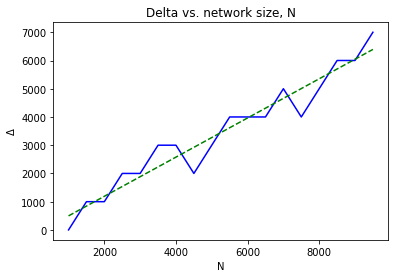

Wall time: 14 s


In [55]:
N_list = list(map(int,np.arange(1000,10000,500)))   #Network sizes to try
%time test_phase_transition_type(N_list,mstep=500)

In [ ]:
N_list = list(map(int,np.linspace(10000,100000,10)))   #Network sizes to try
%time test_phase_transition_type(N_list,mstep=1000)

test_phase_transition_type says: current N=10000
Network size: 10000
Threshold 1: 100
Threshold 2: 5000
m: 1000
Largest component size: 1
m: 2000
Largest component size: 1
m: 3000
Largest component size: 1
m: 4000
Largest component size: 1
m: 5000
Largest component size: 1
m: 6000
Largest component size: 1
m: 7000
Largest component size: 1
m: 8000
Largest component size: 1
m: 9000
Largest component size: 1
m: 10000
Largest component size: 20
m: 11000
Largest component size: 65
m: 12000
PAST THRESHOLD 1, m=12000
Largest component size: 943
m: 13000
Largest component size: 1707
m: 14000
Largest component size: 2546
m: 15000
Largest component size: 3355
m: 16000
Largest component size: 3977
m: 17000
Largest component size: 4652
m: 18000
PAST THRESHOLD 2, m=18000
FINISHED N=10000
test_phase_transition_type says: current N=20000
Network size: 20000
Threshold 1: 141
Threshold 2: 10000
m: 1000
Largest component size: 1
m: 2000
Largest component size: 1
m: 3000
Largest component size: 1
m: 400

Largest component size: 1
m: 35000
Largest component size: 1
m: 36000
Largest component size: 1
m: 37000
Largest component size: 1
m: 38000
Largest component size: 1
m: 39000
Largest component size: 1
m: 40000
Largest component size: 1
m: 41000
Largest component size: 1
m: 42000
Largest component size: 1
m: 43000
Largest component size: 1
m: 44000
Largest component size: 1
m: 45000
Largest component size: 1
m: 46000
Largest component size: 1
m: 47000
Largest component size: 19
m: 48000
Largest component size: 19
m: 49000
Largest component size: 19
m: 50000
Largest component size: 19
m: 51000
Largest component size: 50
m: 52000
Largest component size: 50
m: 53000
PAST THRESHOLD 1, m=53000
Largest component size: 689
m: 54000
Largest component size: 1166
m: 55000
Largest component size: 1776
m: 56000
Largest component size: 2455
m: 57000
Largest component size: 2927
m: 58000
Largest component size: 3634
m: 59000
Largest component size: 4364
m: 60000
Largest component size: 5349
m: 61000


Largest component size: 6
m: 61000
Largest component size: 10
m: 62000
Largest component size: 10
m: 63000
Largest component size: 10
m: 64000
Largest component size: 16
m: 65000
Largest component size: 16
m: 66000
Largest component size: 16
m: 67000
Largest component size: 16
m: 68000
Largest component size: 70
m: 69000
Largest component size: 174
m: 70000
Largest component size: 229
m: 71000
PAST THRESHOLD 1, m=71000
Largest component size: 345
m: 72000
Largest component size: 656
m: 73000
Largest component size: 752
m: 74000
Largest component size: 1139
m: 75000
Largest component size: 1399
m: 76000
Largest component size: 2033
m: 77000
Largest component size: 2481
m: 78000
Largest component size: 3421
m: 79000
Largest component size: 4056
m: 80000
Largest component size: 4543
m: 81000
Largest component size: 5097
m: 82000
Largest component size: 5796
m: 83000
Largest component size: 6452
m: 84000
Largest component size: 7198
m: 85000
Largest component size: 7977
m: 86000
Largest co

Largest component size: 1
m: 12000
Largest component size: 1
m: 13000
Largest component size: 1
m: 14000
Largest component size: 1
m: 15000
Largest component size: 1
m: 16000
Largest component size: 1
m: 17000
Largest component size: 1
m: 18000
Largest component size: 1
m: 19000
